In [2]:
import sys
print("Python: {}".format(sys.version))
import scipy
print("Scipy: {}".format(scipy.__version__))
import numpy
print("Numpy: {}".format(numpy.__version__))
import matplotlib
print("Matplotlib: {}".format(matplotlib.__version__))
import pandas
print("Pandas: {}".format(pandas.__version__))
import sklearn
print("sklearn: {}".format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Scipy: 1.4.1
Numpy: 1.18.5
Matplotlib: 3.2.1
Pandas: 1.0.4
sklearn: 0.22.2.post1


In [3]:
 from pandas.plotting import scatter_matrix
 from matplotlib import pyplot
 from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
 from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 from sklearn.naive_bayes import GaussianNB
 from sklearn.svm import SVC
 from sklearn.ensemble import VotingClassifier

In [4]:
#loading the data
data=pandas.read_csv('/content/drive/My Drive/IRIS.csv')
#know the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#dimensions of dataset
data.shape

(150, 5)

In [6]:
#statistical summary
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#class distribution - shows number of instances that belongs to each class
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**DATA VISUALISATION**


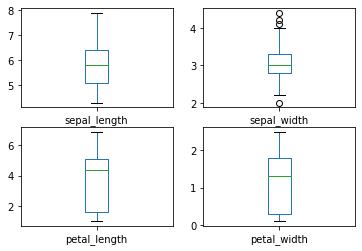

In [8]:
#univariant plot: to understande each attribute - box and whisker plot
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False)
pyplot.show()

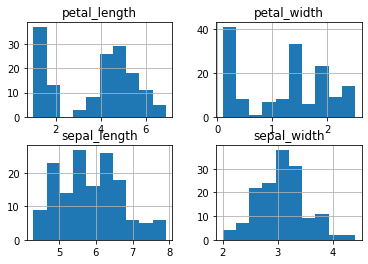

In [9]:
#histogram of variable
data.hist()
pyplot.show()

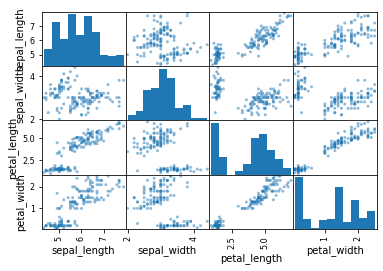

In [10]:
# multivariant plots: to find interaction between the attributes - scatter plot
scatter_matrix(data)
pyplot.show()

**Creating a Validation set**

In [11]:
#splittind data
array=data.values
x=array[:,:4]
y=array[:,4]


In [12]:
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.2,random_state=1)

**Model Development**

In [14]:
# LINEAR MODEL
# logistic regression
# linear discriminant analysis
# NON LINEAR MODEL
# KNN
# Classification and regression trees
# Gaussian NB
# SVM

# building model
model=[]
model.append(("LR", LogisticRegression(solver='liblinear',multi_class='ovr')))
model.append(("LDA", LinearDiscriminantAnalysis()))
model.append(("KNN", KNeighborsClassifier()))
model.append(("NB", GaussianNB()))
model.append(("SVM", SVC(gamma='auto')))

In [16]:
#evaluate models
results=[]
names=[]
for name,mod in model:
  kfold=StratifiedKFold(n_splits=10,random_state=1)
  cv_results=cross_val_score(mod,xtrain,ytrain, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f)"%(name,cv_results.mean(),cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

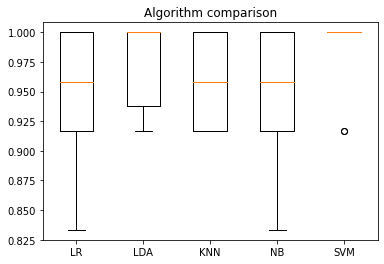

In [18]:
# compare our models
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm comparison')
pyplot.show()

In [19]:
# predictions on sfm as its best among models
model=SVC(gamma='auto')
model.fit(xtrain,ytrain)
pred=model.predict(xvalid)

In [20]:
# evaluate the predict
print(accuracy_score(yvalid,pred))
print(confusion_matrix(yvalid,pred))
print(classification_report(yvalid,pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

